In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,160 kB]
Get:14 https://r2u.stat.illinois

In [3]:
filename = 'dataPrabowo.csv'
search_keyword = "prabowo lang:id"
limit = 1000

!npx --yes tweet-harvest@latest -o "{filename}" -s "{search_keyword}" -l {limit} --token ""

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠦npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠧npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone el

In [4]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)

data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1757937871485546900,Thu Feb 15 01:20:24 +0000 2024,31089,Yang menang secara formal memang Prabowo-Gibra...,1757937871485546900,https://pbs.twimg.com/media/GGVzLHTbkAAeBDq.jpg,NaN,in,Indonesia,698,822,4108,https://x.com/utdfocusid/status/17579378714855...,1345281599605075969,utdfocusid
1,1829682463418814636,Sat Aug 31 00:47:47 +0000 2024,17721,jejak digital gibran menghina prabowo di kasku...,1829682463418814636,https://pbs.twimg.com/media/GWRWI7-bwAALfcB.jpg,NaN,in,NaN,216,483,5314,https://x.com/benaradil/status/182968246341881...,1490799782952316930,benaradil
2,1795826031460569132,Wed May 29 14:34:25 +0000 2024,22087,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,1795826031460569132,https://pbs.twimg.com/media/GOwNinObQAERpeT.jpg,NaN,in,Kutub Selatan,9007,3726,3167,https://x.com/timpenguinnas/status/17958260314...,1457753196269473793,timpenguinnas
3,1757642400716222595,Wed Feb 14 05:46:18 +0000 2024,30490,prediksi sementara di @kawalpemilu_org anies: ...,1757642400716222595,https://pbs.twimg.com/media/GGRmcFMXUAAwoOi.jpg,NaN,in,NaN,618,1086,4278,https://x.com/dayatpiliang/status/175764240071...,598073319,dayatpiliang
4,1826787824278143082,Fri Aug 23 01:05:32 +0000 2024,32483,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,1826787824278143082,https://pbs.twimg.com/media/GVoN16gbgAI4N6k.jpg,NaN,in,NaN,360,1189,9771,https://x.com/MayaA62580468/status/18267878242...,1459664329402290177,MayaA62580468


In [5]:
data = data[['id_str', 'full_text']]
data

,id_str,full_text
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...
...,...,...
775,1842086814158619024,Prabowo mengatakan memiliki banyak kesamaan de...
776,1734575646376869974,Intinya rakyat yang putuskan rakyat yang meni...
777,1743986893380075983,Harusnya langsung tanya aja apakah pak prabowo...
778,1842093950645240118,Haedar Tegaskan Muhammadiyah Tak Intervensi Da...


In [6]:
data.to_csv('dataPrabowo_dropped.csv', index=False)

In [7]:
def lowerCase(text):
  return text.lower()

data['hurufKecil_fullText'] = data['full_text'].apply(lowerCase)
data.head(5)

,id_str,full_text,hurufKecil_fullText
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...


In [8]:
import re
import string

def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', ''  , text) #remove mention
  text = re.sub(r'#[A-Za-z0-9]+', ''  , text) #remove hashtag
  text = re.sub(r'RT[\s]+', ''  , text) #remove RT
  text = re.sub(r'https?:\/\/\S+', ''  , text) #remove link
  text = re.sub(r'[0-9]+', ''  , text) #remove angka
  text = re.sub(r'[^A-Za-z ]+', ''  , text) #remove semua karakter yang bukan alfabet

  text = text.replace('\n',' ') # Mengganti baris baru menjadi spasi
  text = text.translate(str.maketrans('','',string.punctuation)) # menghilangkan semua tanda baca
  text = text.strip(' ') # hapus spasi karakter dari teks kiri dan kanan
  return text

data['cleaning'] = data['hurufKecil_fullText'].apply(cleaningText)
data.head(10)

,id_str,full_text,hurufKecil_fullText,cleaning
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...,yang menang secara formal memang prabowogibran...
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...,ponakannya pak prabowo sama anaknya pak jokowi
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di org anies prabowo ganjar
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...,lagi rame di medsos boikot artis yg jd influen...
5,1759871131383984381,Lain kali ajarkan sopan santun adab dan etika ...,lain kali ajarkan sopan santun adab dan etika ...,lain kali ajarkan sopan santun adab dan etika ...
6,1753837674144879054,Kumpulan momen ketika prabowo selalu memikirka...,kumpulan momen ketika prabowo selalu memikirka...,kumpulan momen ketika prabowo selalu memikirka...
7,1783001408578760954,BREAKING: KPU RI resmi menetapkan Prabowo Subi...,breaking: kpu ri resmi menetapkan prabowo subi...,breaking kpu ri resmi menetapkan prabowo subia...
8,1756574035025240533,Suatu kehormatan bagi saya dapat hadir di teng...,suatu kehormatan bagi saya dapat hadir di teng...,suatu kehormatan bagi saya dapat hadir di teng...
9,1744223379794907525,dua kata lucu: nangisin prabowo https://t.co/3...,dua kata lucu: nangisin prabowo https://t.co/3...,dua kata lucu nangisin prabowo


In [9]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
from nltk.tokenize import word_tokenize

def tokenizing(text):
  text = nltk.word_tokenize(text)
  return text

data['tokenizing'] = data['cleaning'].apply(tokenizing)
data.head(10)

,id_str,full_text,hurufKecil_fullText,cleaning,tokenizing
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...,yang menang secara formal memang prabowogibran...,"[yang, menang, secara, formal, memang, prabowo..."
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,"[jejak, digital, gibran, menghina, prabowo, di..."
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...,ponakannya pak prabowo sama anaknya pak jokowi,"[ponakannya, pak, prabowo, sama, anaknya, pak,..."
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di org anies prabowo ganjar,"[prediksi, sementara, di, org, anies, prabowo,..."
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...,lagi rame di medsos boikot artis yg jd influen...,"[lagi, rame, di, medsos, boikot, artis, yg, jd..."
5,1759871131383984381,Lain kali ajarkan sopan santun adab dan etika ...,lain kali ajarkan sopan santun adab dan etika ...,lain kali ajarkan sopan santun adab dan etika ...,"[lain, kali, ajarkan, sopan, santun, adab, dan..."
6,1753837674144879054,Kumpulan momen ketika prabowo selalu memikirka...,kumpulan momen ketika prabowo selalu memikirka...,kumpulan momen ketika prabowo selalu memikirka...,"[kumpulan, momen, ketika, prabowo, selalu, mem..."
7,1783001408578760954,BREAKING: KPU RI resmi menetapkan Prabowo Subi...,breaking: kpu ri resmi menetapkan prabowo subi...,breaking kpu ri resmi menetapkan prabowo subia...,"[breaking, kpu, ri, resmi, menetapkan, prabowo..."
8,1756574035025240533,Suatu kehormatan bagi saya dapat hadir di teng...,suatu kehormatan bagi saya dapat hadir di teng...,suatu kehormatan bagi saya dapat hadir di teng...,"[suatu, kehormatan, bagi, saya, dapat, hadir, ..."
9,1744223379794907525,dua kata lucu: nangisin prabowo https://t.co/3...,dua kata lucu: nangisin prabowo https://t.co/3...,dua kata lucu nangisin prabowo,"[dua, kata, lucu, nangisin, prabowo]"


In [11]:
!pip install Sastrawi
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00
['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu

In [12]:
def stopword(text):
  text = [word for word in text if word not in stopwords]
  return text

data['stopword'] = data['tokenizing'].apply(stopword)
data.head()

,id_str,full_text,hurufKecil_fullText,cleaning,tokenizing,stopword
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...,yang menang secara formal memang prabowogibran...,"[yang, menang, secara, formal, memang, prabowo...","[menang, formal, memang, prabowogibran, menang..."
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,"[jejak, digital, gibran, menghina, prabowo, di...","[jejak, digital, gibran, menghina, prabowo, ka..."
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...,ponakannya pak prabowo sama anaknya pak jokowi,"[ponakannya, pak, prabowo, sama, anaknya, pak,...","[ponakannya, pak, prabowo, sama, anaknya, pak,..."
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di org anies prabowo ganjar,"[prediksi, sementara, di, org, anies, prabowo,...","[prediksi, org, anies, prabowo, ganjar]"
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...,lagi rame di medsos boikot artis yg jd influen...,"[lagi, rame, di, medsos, boikot, artis, yg, jd...","[rame, medsos, boikot, artis, yg, jd, influenc..."


In [13]:
stemmer = StemmerFactory().create_stemmer()

def stemming(text):
  text = [stemmer.stem(word) for word in text]
  return text

data['stemming'] = data['stopword'].apply(stemming)
data.head()

,id_str,full_text,hurufKecil_fullText,cleaning,tokenizing,stopword,stemming
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...,yang menang secara formal memang prabowogibran...,"[yang, menang, secara, formal, memang, prabowo...","[menang, formal, memang, prabowogibran, menang...","[menang, formal, memang, prabowogibran, menang..."
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,"[jejak, digital, gibran, menghina, prabowo, di...","[jejak, digital, gibran, menghina, prabowo, ka...","[jejak, digital, gibran, hina, prabowo, kaskus..."
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...,ponakannya pak prabowo sama anaknya pak jokowi,"[ponakannya, pak, prabowo, sama, anaknya, pak,...","[ponakannya, pak, prabowo, sama, anaknya, pak,...","[ponakan, pak, prabowo, sama, anak, pak, jokowi]"
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di org anies prabowo ganjar,"[prediksi, sementara, di, org, anies, prabowo,...","[prediksi, org, anies, prabowo, ganjar]","[prediksi, org, anies, prabowo, ganjar]"
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...,lagi rame di medsos boikot artis yg jd influen...,"[lagi, rame, di, medsos, boikot, artis, yg, jd...","[rame, medsos, boikot, artis, yg, jd, influenc...","[rame, medsos, boikot, artis, yg, jd, influenc..."


In [14]:
def clean_and_convert(text):
  if isinstance(text, list):
    return ' '.join(text)
  elif isinstance(text, str):
    try:
      word_list = ast.literal_eval(text)
      if isinstance(word_list, list):
        return ' '.join(word_list)
      else:
        cleaned_text = re.sub(r"[\'\[\],]", "", text)
        return cleaned_text.strip()
    except (ValueError, SyntaxError):
      cleaned_text = re.sub(r"[\'\[\],]", "", text)
      return cleaned_text.strip()
  else:
      return ''

data['cleaning_stemmed'] = data['stemming'].apply(clean_and_convert)
data.head()

,id_str,full_text,hurufKecil_fullText,cleaning,tokenizing,stopword,stemming,cleaning_stemmed
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...,yang menang secara formal memang prabowogibran...,"[yang, menang, secara, formal, memang, prabowo...","[menang, formal, memang, prabowogibran, menang...","[menang, formal, memang, prabowogibran, menang...",menang formal memang prabowogibran menang simb...
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,"[jejak, digital, gibran, menghina, prabowo, di...","[jejak, digital, gibran, menghina, prabowo, ka...","[jejak, digital, gibran, hina, prabowo, kaskus...",jejak digital gibran hina prabowo kaskus bongk...
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...,ponakannya pak prabowo sama anaknya pak jokowi,"[ponakannya, pak, prabowo, sama, anaknya, pak,...","[ponakannya, pak, prabowo, sama, anaknya, pak,...","[ponakan, pak, prabowo, sama, anak, pak, jokowi]",ponakan pak prabowo sama anak pak jokowi
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di org anies prabowo ganjar,"[prediksi, sementara, di, org, anies, prabowo,...","[prediksi, org, anies, prabowo, ganjar]","[prediksi, org, anies, prabowo, ganjar]",prediksi org anies prabowo ganjar
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...,lagi rame di medsos boikot artis yg jd influen...,"[lagi, rame, di, medsos, boikot, artis, yg, jd...","[rame, medsos, boikot, artis, yg, jd, influenc...","[rame, medsos, boikot, artis, yg, jd, influenc...",rame medsos boikot artis yg jd influencer joko...


In [15]:
data = data.dropna(subset=['cleaning_stemmed'])
data.head()

,id_str,full_text,hurufKecil_fullText,cleaning,tokenizing,stopword,stemming,cleaning_stemmed
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...,yang menang secara formal memang prabowogibran...,"[yang, menang, secara, formal, memang, prabowo...","[menang, formal, memang, prabowogibran, menang...","[menang, formal, memang, prabowogibran, menang...",menang formal memang prabowogibran menang simb...
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,"[jejak, digital, gibran, menghina, prabowo, di...","[jejak, digital, gibran, menghina, prabowo, ka...","[jejak, digital, gibran, hina, prabowo, kaskus...",jejak digital gibran hina prabowo kaskus bongk...
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...,ponakannya pak prabowo sama anaknya pak jokowi,"[ponakannya, pak, prabowo, sama, anaknya, pak,...","[ponakannya, pak, prabowo, sama, anaknya, pak,...","[ponakan, pak, prabowo, sama, anak, pak, jokowi]",ponakan pak prabowo sama anak pak jokowi
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di org anies prabowo ganjar,"[prediksi, sementara, di, org, anies, prabowo,...","[prediksi, org, anies, prabowo, ganjar]","[prediksi, org, anies, prabowo, ganjar]",prediksi org anies prabowo ganjar
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...,lagi rame di medsos boikot artis yg jd influen...,"[lagi, rame, di, medsos, boikot, artis, yg, jd...","[rame, medsos, boikot, artis, yg, jd, influenc...","[rame, medsos, boikot, artis, yg, jd, influenc...",rame medsos boikot artis yg jd influencer joko...


In [16]:
data.isnull().sum()

,0
id_str,0
full_text,0
hurufKecil_fullText,0
cleaning,0
tokenizing,0
stopword,0
stemming,0
cleaning_stemmed,0


In [17]:
data.to_csv('dataPrabowo_cleaned.csv', index=False)

In [18]:
from nltk import FreqDist

all_tokens = [token for tokens in data['stemming'] for token in tokens]
freq_dist = FreqDist(all_tokens)
freq_dist.most_common()

[('prabowo', 671),
 ('pak', 249),
 ('presiden', 211),
 ('jokowi', 198),
 ('jadi', 146),
 ('gibran', 141),
 ('yg', 138),
 ('pilih', 133),
 ('indonesia', 103),
 ('kabinet', 99),
 ('menteri', 95),
 ('subianto', 89),
 ('prabowogibran', 79),
 ('sama', 79),
 ('dukung', 78),
 ('fufufafa', 70),
 ('lantik', 69),
 ('perintah', 61),
 ('negara', 55),
 ('amp', 54),
 ('orang', 50),
 ('anies', 49),
 ('ri', 48),
 ('rakyat', 48),
 ('mau', 48),
 ('kalau', 48),
 ('kata', 46),
 ('wakil', 45),
 ('tak', 45),
 ('hari', 45),
 ('buat', 44),
 ('gak', 43),
 ('apa', 43),
 ('makan', 43),
 ('soal', 43),
 ('lebih', 41),
 ('tni', 39),
 ('bukan', 39),
 ('hadir', 38),
 ('aja', 38),
 ('pimpin', 38),
 ('banyak', 38),
 ('tahun', 37),
 ('partai', 37),
 ('bapak', 37),
 ('akun', 36),
 ('masuk', 36),
 ('temu', 35),
 ('menang', 34),
 ('pdip', 34),
 ('semua', 34),
 ('anak', 33),
 ('jangan', 32),
 ('jalan', 32),
 ('terima', 31),
 ('milik', 31),
 ('baik', 31),
 ('mas', 31),
 ('aku', 31),
 ('beliau', 29),
 ('hina', 28),
 ('satu', 

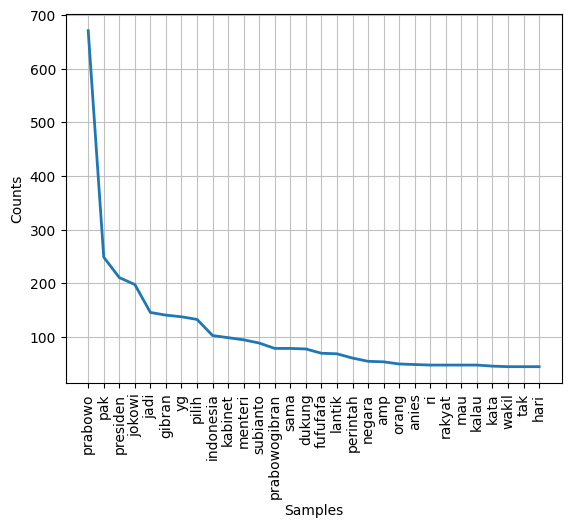

In [19]:
freq_dist.plot(30, cumulative=False)
plt.show()